#**Artur Bakunts and Tigran Gabrielyan**

### **Project Introduction:**
In this mini project, I chose to scrape data from FIDE.com, the official chess federation website. I collected information on the top 100 chess players across different groups — men, women, juniors, and girls — and across different chess categories: classic, rapid, and blitz. This dataset allows for analysis of player ratings, trends, and comparisons between groups and formats.

# **Task 1: Data Scraping:**

### **Data Collection / Scraping:**
The data was originally scraped using Selenium in my local environment, because Selenium does not work reliably in Google Colaboratory. I collected the top 100 players across all groups and categories, saved the results as CSV files, and uploaded them to GitHub.

In Colab, I then read the CSV files directly from GitHub to continue with data cleaning, preprocessing, and analysis. This approach ensures reproducibility while overcoming the limitations of web scraping in Colab.

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

# Setup Selenium
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)

tabs = {1: "men", 2: "women", 3: "juniors", 4: "girls",
        5: "men_rapid", 6: "women_rapid", 7: "juniors_rapid", 8: "girls_rapid",
        9: "men_blitz", 10: "women_blitz", 11: "juniors_blitz", 12: "girls_blitz"}

players = {}

for tab, url_name in tabs.items():

    print(f"Scraping {url_name}...")

    players[url_name] = []

    page_url = f"https://ratings.fide.com/top_lists.phtml?list={url_name}"
    driver.get(page_url)
    time.sleep(2)

    # Loop until we have 100 players
    while len(players[url_name]) < 100:

        div = driver.find_element(By.ID, f"tabs-{tab}")
        rows = div.find_elements(By.CSS_SELECTOR, "table:nth-of-type(1) tr")

        for row in rows[1:]:
            cols = row.find_elements(By.TAG_NAME, "td")
            if len(cols) >= 5:

                players[url_name].append({
                    "Rank": cols[0].text,
                    "Name": cols[1].text,
                    "Country": cols[2].text,
                    "Rating": cols[3].text,
                    "Birth Year": cols[4].text if len(cols) > 4 else ""
                })

            if len(players[url_name]) >= 100:
                break

        # Click Next page if exists
        try:
            next_btn = driver.find_element(By.LINK_TEXT, "Next")
            next_btn.click()
            time.sleep(1)
        except:
            break

driver.quit()


#  Convert each category to pandas DataFrame and export
for category, data in players.items():
    df = pd.DataFrame(data)
    df = df.head(100)                     # ensure max 100
    df.to_csv(f"fide_top100_{category}.csv", index=False)
    print(f"Saved: fide_top100_{category}.csv")


print("\nAll CSV files created successfully!")


# **Task 2: Data Cleaning**

 ### **Load Data from GitHub**
 Read all 12 scraped CSV files directly from your GitHub repository into pandas DataFrames.

In [36]:
import pandas as pd

# GitHub raw URLs for each CSV
urls = {
    "men": "https://raw.githubusercontent.com/ArturBakunc/FIDE-Top-100-chess-players-classic-rapid-blitz-/main/fide_top100_men.csv",
    "women": "https://raw.githubusercontent.com/ArturBakunc/FIDE-Top-100-chess-players-classic-rapid-blitz-/main/fide_top100_women.csv",
    "juniors": "https://raw.githubusercontent.com/ArturBakunc/FIDE-Top-100-chess-players-classic-rapid-blitz-/main/fide_top100_juniors.csv",
    "girls": "https://raw.githubusercontent.com/ArturBakunc/FIDE-Top-100-chess-players-classic-rapid-blitz-/main/fide_top100_girls.csv",
    "men_rapid": "https://raw.githubusercontent.com/ArturBakunc/FIDE-Top-100-chess-players-classic-rapid-blitz-/main/fide_top100_men_rapid.csv",
    "women_rapid": "https://raw.githubusercontent.com/ArturBakunc/FIDE-Top-100-chess-players-classic-rapid-blitz-/main/fide_top100_women_rapid.csv",
    "juniors_rapid": "https://raw.githubusercontent.com/ArturBakunc/FIDE-Top-100-chess-players-classic-rapid-blitz-/main/fide_top100_juniors_rapid.csv",
    "girls_rapid": "https://raw.githubusercontent.com/ArturBakunc/FIDE-Top-100-chess-players-classic-rapid-blitz-/main/fide_top100_girls_rapid.csv",
    "men_blitz": "https://raw.githubusercontent.com/ArturBakunc/FIDE-Top-100-chess-players-classic-rapid-blitz-/main/fide_top100_men_blitz.csv",
    "women_blitz": "https://raw.githubusercontent.com/ArturBakunc/FIDE-Top-100-chess-players-classic-rapid-blitz-/main/fide_top100_women_blitz.csv",
    "juniors_blitz": "https://raw.githubusercontent.com/ArturBakunc/FIDE-Top-100-chess-players-classic-rapid-blitz-/main/fide_top100_juniors_blitz.csv",
    "girls_blitz": "https://raw.githubusercontent.com/ArturBakunc/FIDE-Top-100-chess-players-classic-rapid-blitz-/main/fide_top100_girls_blitz.csv"
}

# Dictionary to store DataFrames
all_data = {}

# Load CSVs
for category, url in urls.items():
    df = pd.read_csv(url)
    all_data[category] = df
    print(df)


    Rank                  Name Country  Rating  Birth Year
0      1       Carlsen, Magnus     NOR    2839        1990
1      2      Nakamura, Hikaru     USA    2813        1987
2      3      Caruana, Fabiano     USA    2795        1992
3      4       Keymer, Vincent     GER    2773        2004
4      5           Giri, Anish     NED    2769        1994
..   ...                   ...     ...     ...         ...
95    96             Pranesh M     IND    2630        2006
96    97  Hovhannisyan, Robert     ARM    2629        1991
97    98       Chigaev, Maksim     ESP    2628        1996
98    99          Amin, Bassem     EGY    2628        1988
99   100      Kollars, Dmitrij     GER    2628        1999

[100 rows x 5 columns]
    Rank                     Name Country  Rating  Birth Year
0      1               Hou, Yifan     CHN    2620        1994
1      2               Zhu, Jiner     CHN    2579        2002
2      3             Lei, Tingjie     CHN    2569        1997
3      4            

### **Identify Missing Values**
Check each dataset for missing values to decide how to handle them.

In [37]:
for category, df in all_data.items():
    print(f"\nCategory: {category}")
    print(df.isnull().sum())



Category: men
Rank          0
Name          0
Country       0
Rating        0
Birth Year    0
dtype: int64

Category: women
Rank          0
Name          0
Country       0
Rating        0
Birth Year    0
dtype: int64

Category: juniors
Rank          0
Name          0
Country       0
Rating        0
Birth Year    0
dtype: int64

Category: girls
Rank          0
Name          0
Country       0
Rating        0
Birth Year    0
dtype: int64

Category: men_rapid
Rank          0
Name          0
Country       0
Rating        0
Birth Year    0
dtype: int64

Category: women_rapid
Rank          0
Name          0
Country       0
Rating        0
Birth Year    0
dtype: int64

Category: juniors_rapid
Rank          0
Name          0
Country       0
Rating        0
Birth Year    0
dtype: int64

Category: girls_rapid
Rank          0
Name          0
Country       0
Rating        0
Birth Year    0
dtype: int64

Category: men_blitz
Rank          0
Name          0
Country       0
Rating        0
Birth Year 

###**Handle Missing Values**
**Description:** Fill missing "Birth Year" with "Unknown"; ensure other columns are valid.

In [100]:
for category, df in all_data.items():
    # Fill missing Birth Year
    df['Birth Year'] = df['Birth Year'].fillna("Unknown")
    all_data[category] = df
all_data

{'men':     Rank                  Name Country  Rating  Birth Year
 0      1       Carlsen, Magnus     NOR    2839        1990
 1      2      Nakamura, Hikaru     USA    2813        1987
 2      3      Caruana, Fabiano     USA    2795        1992
 3      4       Keymer, Vincent     GER    2773        2004
 4      5           Giri, Anish     NED    2769        1994
 ..   ...                   ...     ...     ...         ...
 95    96             Pranesh M     IND    2630        2006
 96    97  Hovhannisyan, Robert     ARM    2629        1991
 97    98       Chigaev, Maksim     ESP    2628        1996
 98    99          Amin, Bassem     EGY    2628        1988
 99   100      Kollars, Dmitrij     GER    2628        1999
 
 [100 rows x 5 columns],
 'women':     Rank                     Name Country  Rating  Birth Year
 0      1               Hou, Yifan     CHN    2620        1994
 1      2               Zhu, Jiner     CHN    2579        2002
 2      3             Lei, Tingjie     CHN    25

### **Ensure Numeric Columns**
**Description:** Convert Rank and Rating to numeric, drop rows with invalid values.

In [104]:
for category, df in all_data.items():
    df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    df = df.dropna(subset=['Rank', 'Rating'])  # drop invalid rows
    all_data[category] = df
all_data

{'men':     Rank                  Name Country  Rating  Birth Year
 0      1       Carlsen, Magnus     NOR    2839        1990
 1      2      Nakamura, Hikaru     USA    2813        1987
 2      3      Caruana, Fabiano     USA    2795        1992
 3      4       Keymer, Vincent     GER    2773        2004
 4      5           Giri, Anish     NED    2769        1994
 ..   ...                   ...     ...     ...         ...
 95    96             Pranesh M     IND    2630        2006
 96    97  Hovhannisyan, Robert     ARM    2629        1991
 97    98       Chigaev, Maksim     ESP    2628        1996
 98    99          Amin, Bassem     EGY    2628        1988
 99   100      Kollars, Dmitrij     GER    2628        1999
 
 [100 rows x 5 columns],
 'women':     Rank                     Name Country  Rating  Birth Year
 0      1               Hou, Yifan     CHN    2620        1994
 1      2               Zhu, Jiner     CHN    2579        2002
 2      3             Lei, Tingjie     CHN    25

###**Save Cleaned CSV Files**

This part exports the cleaned datasets to new CSV files.

In [40]:
for category, df in all_data.items():
    df.to_csv(f"cleaned_{category}.csv", index=False)
    print(f"Saved cleaned_{category}.csv with {len(df)} rows")

Saved cleaned_men.csv with 100 rows
Saved cleaned_women.csv with 100 rows
Saved cleaned_juniors.csv with 100 rows
Saved cleaned_girls.csv with 100 rows
Saved cleaned_men_rapid.csv with 100 rows
Saved cleaned_women_rapid.csv with 100 rows
Saved cleaned_juniors_rapid.csv with 100 rows
Saved cleaned_girls_rapid.csv with 100 rows
Saved cleaned_men_blitz.csv with 100 rows
Saved cleaned_women_blitz.csv with 100 rows
Saved cleaned_juniors_blitz.csv with 100 rows
Saved cleaned_girls_blitz.csv with 100 rows


## **Task 3: Data Preprocessing:**

**Part 1: Data Integration (Merging Multiple Categories)**

 **Description:** This part loads all cleaned CSV files and merge them into one dataset.

In [102]:
# List of cleaned CSV categories
categories = [
    "men","women","juniors","girls",
    "men_rapid","women_rapid","juniors_rapid","girls_rapid",
    "men_blitz","women_blitz","juniors_blitz","girls_blitz"
]

all_df = []

for cat in categories:
    df = pd.read_csv(f"cleaned_{cat}.csv")
    df["Category"] = cat
    all_df.append(df)

merged_df = pd.concat(all_df, ignore_index=True)

print("Merged Data (first rows 50 rows):")
merged_df


Merged Data (first rows 50 rows):


,Rank,Name,Country,Rating,Birth Year,Category
0,1,"Carlsen, Magnus",NOR,2839,1990,men
1,2,"Nakamura, Hikaru",USA,2813,1987,men
2,3,"Caruana, Fabiano",USA,2795,1992,men
3,4,"Keymer, Vincent",GER,2773,2004,men
4,5,"Giri, Anish",NED,2769,1994,men
...,...,...,...,...,...,...
1195,96,"Dicen, Elis Denele",ENG,2076,2010,girls_blitz
1196,97,"Nur-Mukhametova, Alisa",RUS,2075,2005,girls_blitz
1197,98,"Norman, Kseniya",FID,2075,2007,girls_blitz
1198,99,"Butenandt, Svenja",GER,2075,2006,girls_blitz


**Part 2: Feature Engineering**

**Description:** This part adds new useful features for analysis — for example, age, rating group, and format type (classic/rapid/blitz).

In [42]:
from datetime import datetime

current_year = datetime.now().year

# Convert Birth Year → Age
merged_df["Age"] = merged_df["Birth Year"].replace("Unknown", None).astype(float)
merged_df["Age"] = current_year - merged_df["Age"]

# Rating levels
merged_df["Rating_Level"] = pd.cut(
    merged_df["Rating"],
    bins=[0, 2200, 2400, 2600, 2800, 3000],
    labels=["Candidate Master", "Master", "IM", "GM", "Super GM"]
)

# Extract Format (classic/rapid/blitz)
merged_df["Format"] = merged_df["Category"].apply(
    lambda x: "classic" if "_" not in x else x.split("_")[1]
)

print("\nAfter Feature Engineering:")
merged_df.head(50)


After Feature Engineering:


,Rank,Name,Country,Rating,Birth Year,Category,Age,Rating_Level,Format
0,1,"Carlsen, Magnus",NOR,2839,1990,men,35.0,Super GM,classic
1,2,"Nakamura, Hikaru",USA,2813,1987,men,38.0,Super GM,classic
2,3,"Caruana, Fabiano",USA,2795,1992,men,33.0,GM,classic
3,4,"Keymer, Vincent",GER,2773,2004,men,21.0,GM,classic
4,5,"Giri, Anish",NED,2769,1994,men,31.0,GM,classic
5,6,Erigaisi Arjun,IND,2769,2003,men,22.0,GM,classic
6,7,Praggnanandhaa R,IND,2768,2005,men,20.0,GM,classic
7,8,"So, Wesley",USA,2764,1993,men,32.0,GM,classic
8,9,Gukesh D,IND,2763,2006,men,19.0,GM,classic
9,10,"Firouzja, Alireza",FRA,2762,2003,men,22.0,GM,classic


**Part 3: Data Transformation (Normalization / Standardization)**

**Description:** This part ***normalizes*** rating and ***standardize*** age.

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization
scaler = MinMaxScaler()
merged_df["Rating_Norm"] = scaler.fit_transform(merged_df[["Rating"]])

# Standardization
standardizer = StandardScaler()
merged_df["Age_Std"] = standardizer.fit_transform(merged_df[["Age"]])

print("\nAfter Normalization & Standardization:")
merged_df.head(50)


After Normalization & Standardization:


,Rank,Name,Country,Rating,Birth Year,Category,Age,Rating_Level,Format,Rating_Norm,Age_Std
0,1,"Carlsen, Magnus",NOR,2839,1990,men,35.0,Super GM,classic,0.947891,1.034005
1,2,"Nakamura, Hikaru",USA,2813,1987,men,38.0,Super GM,classic,0.915633,1.333451
2,3,"Caruana, Fabiano",USA,2795,1992,men,33.0,GM,classic,0.893300,0.834374
3,4,"Keymer, Vincent",GER,2773,2004,men,21.0,GM,classic,0.866005,-0.363411
4,5,"Giri, Anish",NED,2769,1994,men,31.0,GM,classic,0.861042,0.634743
5,6,Erigaisi Arjun,IND,2769,2003,men,22.0,GM,classic,0.861042,-0.263596
6,7,Praggnanandhaa R,IND,2768,2005,men,20.0,GM,classic,0.859801,-0.463227
7,8,"So, Wesley",USA,2764,1993,men,32.0,GM,classic,0.854839,0.734558
8,9,Gukesh D,IND,2763,2006,men,19.0,GM,classic,0.853598,-0.563042
9,10,"Firouzja, Alireza",FRA,2762,2003,men,22.0,GM,classic,0.852357,-0.263596


**Part 4: Data Encoding (Categorical → Numeric)**

**Description:** This part uses one-hot encoding on Country, Category, Rating_Level, Format.

In [54]:
encoded_df = pd.get_dummies(
    merged_df,
    columns=["Country", "Category", "Rating_Level", "Format"],
    drop_first=True
)

print("\nAfter Encoding:")
encoded_df.head(50)



After Encoding:


,Rank,Name,Rating,Birth Year,Age,Rating_Norm,Age_Std,Country_ARG,Country_ARM,Country_AUS,...,Category_men_rapid,Category_women,Category_women_blitz,Category_women_rapid,Rating_Level_Master,Rating_Level_IM,Rating_Level_GM,Rating_Level_Super GM,Format_classic,Format_rapid
0,1,"Carlsen, Magnus",2839,1990,35.0,0.947891,1.034005,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,2,"Nakamura, Hikaru",2813,1987,38.0,0.915633,1.333451,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,3,"Caruana, Fabiano",2795,1992,33.0,0.893300,0.834374,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,4,"Keymer, Vincent",2773,2004,21.0,0.866005,-0.363411,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,5,"Giri, Anish",2769,1994,31.0,0.861042,0.634743,False,False,False,...,False,False,False,False,False,False,True,False,True,False
5,6,Erigaisi Arjun,2769,2003,22.0,0.861042,-0.263596,False,False,False,...,False,False,False,False,False,False,True,False,True,False
6,7,Praggnanandhaa R,2768,2005,20.0,0.859801,-0.463227,False,False,False,...,False,False,False,False,False,False,True,False,True,False
7,8,"So, Wesley",2764,1993,32.0,0.854839,0.734558,False,False,False,...,False,False,False,False,False,False,True,False,True,False
8,9,Gukesh D,2763,2006,19.0,0.853598,-0.563042,False,False,False,...,False,False,False,False,False,False,True,False,True,False
9,10,"Firouzja, Alireza",2762,2003,22.0,0.852357,-0.263596,False,False,False,...,False,False,False,False,False,False,True,False,True,False


**Part 5: Data Reduction (PCA - Principal Component Analysis)**

**Description:** This part reduces dataset dimensionality with PCA.

In [55]:
from sklearn.decomposition import PCA

numeric_cols = encoded_df.select_dtypes(include=["int64","float64"]).columns
pca = PCA(n_components=5)
pca_features = pca.fit_transform(encoded_df[numeric_cols])

pca_df = pd.DataFrame(pca_features, columns=[f"PCA_{i}" for i in range(1,6)])

print("\nPCA Components:")
pca_df.head(50)


PCA Components:


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,409.969737,-28.224261,6.066257,9.769963e-15,6.661338e-16
1,384.079621,-28.081923,11.043441,7.993606e-15,6.661338e-16
2,365.863534,-28.618953,4.475692,8.881784e-15,1.110223e-15
3,343.380661,-30.279794,-11.839867,9.769963e-15,1.110223e-15
4,339.727155,-28.147417,2.305846,7.993606e-15,1.110223e-15
5,339.324611,-28.350398,-10.484923,8.881784e-15,1.332268e-15
6,338.197234,-27.670189,-13.366970,7.993606e-15,8.881784e-16
7,334.621867,-25.271721,3.600612,7.993606e-15,6.661338e-16
8,333.064720,-26.055006,-14.801712,8.881784e-15,1.332268e-15
9,332.132693,-24.709572,-10.629087,8.881784e-15,1.110223e-15


**Part 6: Handling Imbalanced Data**

**Description:** This part balances classification target using SMOTE (example: Rating Level).

In [59]:
from imblearn.over_sampling import SMOTE

print("Before SMOTE:", merged_df.shape)

# Ensure the target column exists
target_column = "Category"  # change if needed

# Select numeric features only
X = merged_df.select_dtypes(include=['number'])
y = merged_df[target_column]

print("Shapes before balancing:", X.shape, y.shape)

# Apply SMOTE only on numeric X
sm = SMOTE()
X_balanced, y_balanced = sm.fit_resample(X, y)

print("Shapes after balancing:", X_balanced.shape, y_balanced.shape)

# Convert back to DataFrame
balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df[target_column] = y_balanced

print("\nBalanced dataset preview:")
balanced_df.head(30)


Before SMOTE: (1200, 11)
Shapes before balancing: (1200, 6) (1200,)
Shapes after balancing: (1200, 6) (1200,)

Balanced dataset preview:


,Rank,Rating,Birth Year,Age,Rating_Norm,Age_Std,Category
0,1,2839,1990,35.0,0.947891,1.034005,men
1,2,2813,1987,38.0,0.915633,1.333451,men
2,3,2795,1992,33.0,0.893300,0.834374,men
3,4,2773,2004,21.0,0.866005,-0.363411,men
4,5,2769,1994,31.0,0.861042,0.634743,men
5,6,2769,2003,22.0,0.861042,-0.263596,men
6,7,2768,2005,20.0,0.859801,-0.463227,men
7,8,2764,1993,32.0,0.854839,0.734558,men
8,9,2763,2006,19.0,0.853598,-0.563042,men
9,10,2762,2003,22.0,0.852357,-0.263596,men


# **Task 4**: **Data Analysis (Exploratory Data Analysis — EDA)**

##**4.1 Descriptive Statistics**

**Description:** This part computes ***mean, median, mode, std,*** and look at data distribution using summary statistics.

In [65]:
# Show basic numeric statistics
print("\n Summary Statistics (mean, std, etc.):")
print(merged_df.describe())

# Median of numerical columns
print("\n Median values:")
print(merged_df.median(numeric_only=True))

# Mode (most frequent values)
print("\n Mode values:")
print(merged_df.mode().iloc[0])



 Summary Statistics (mean, std, etc.):
              Rank       Rating   Birth Year          Age  Rating_Norm  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean     50.500000  2431.271667  2000.359167    24.640833     0.442024   
std      28.878105   185.771204    10.022668    10.022668     0.230485   
min       1.000000  2075.000000  1963.000000    10.000000     0.000000   
25%      25.750000  2294.000000  1994.000000    17.000000     0.271712   
50%      50.500000  2424.000000  2005.000000    20.000000     0.433002   
75%      75.250000  2614.000000  2008.000000    31.000000     0.668734   
max     100.000000  2881.000000  2015.000000    62.000000     1.000000   

            Age_Std  Rating_Lag1  Rating_Change  
count  1.200000e+03  1199.000000    1199.000000  
mean   2.368476e-17  2431.568807      -0.637198  
std    1.000417e+00   185.563218      37.745426  
min   -1.461381e+00  2075.000000     -85.000000  
25%   -7.626731e-01  2294.500000      -3.00

##**4.2 Distribution Analysis**

**Description:** This part visualizes the distribution of ***ratings & other numeric variables***.
We use histograms, boxplots, and density plots.


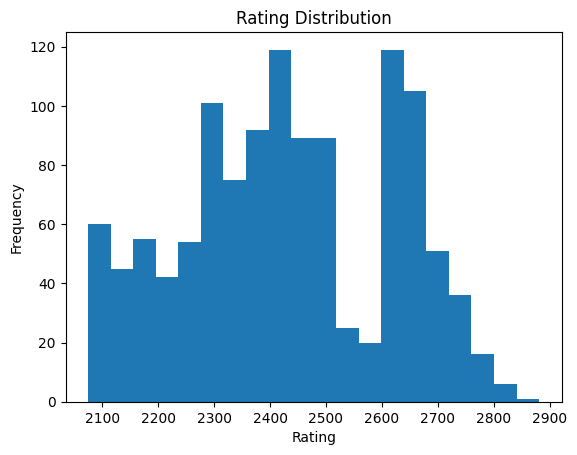

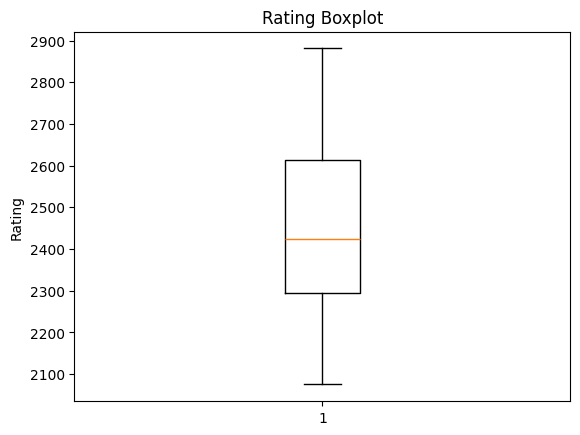

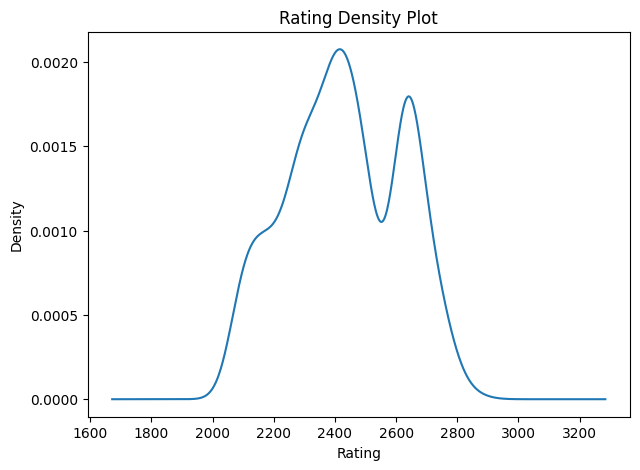

In [76]:
import matplotlib.pyplot as plt

# Histogram for Rating
plt.hist(merged_df["Rating"], bins=20)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Boxplot for Rating
plt.boxplot(merged_df["Rating"])
plt.title("Rating Boxplot")
plt.ylabel("Rating")
plt.show()

# Density plot (KDE)
merged_df["Rating"].plot(kind="kde", figsize=(7,5))
plt.title("Rating Density Plot")
plt.xlabel("Rating")
plt.show()


##**4.3 Correlation Analysis**

**Description:** This part calculates correlations between numeric variables and visualize them with a heatmap.


 Correlation Matrix:
                   Rank    Rating  Birth Year       Age  Rating_Norm  \
Rank           1.000000 -0.321259   -0.014199  0.014199    -0.321259   
Rating        -0.321259  1.000000   -0.360089  0.360089     1.000000   
Birth Year    -0.014199 -0.360089    1.000000 -1.000000    -0.360089   
Age            0.014199  0.360089   -1.000000  1.000000     0.360089   
Rating_Norm   -0.321259  1.000000   -0.360089  0.360089     1.000000   
Age_Std        0.014199  0.360089   -1.000000  1.000000     0.360089   
Rating_Lag1   -0.311006  0.979302   -0.354410  0.354410     0.979302   
Rating_Change -0.039299  0.099408   -0.022107  0.022107     0.099408   

                Age_Std  Rating_Lag1  Rating_Change  
Rank           0.014199    -0.311006      -0.039299  
Rating         0.360089     0.979302       0.099408  
Birth Year    -1.000000    -0.354410      -0.022107  
Age            1.000000     0.354410       0.022107  
Rating_Norm    0.360089     0.979302       0.099408  
Age_S

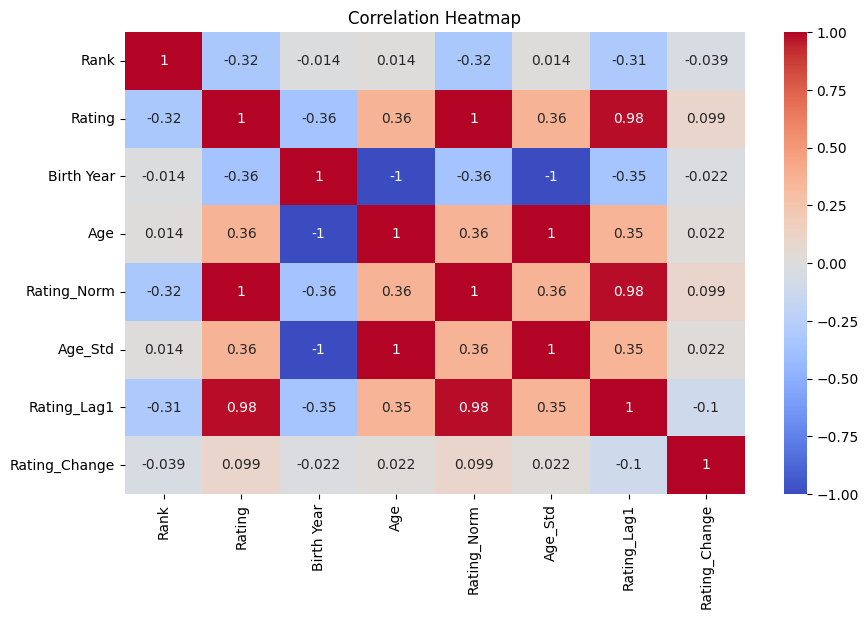

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = merged_df.corr(numeric_only=True)
print("\n Correlation Matrix:")
print(corr_matrix)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


##**4.4 Hypothesis Testing**

**Description:** This part forms simple ***hypotheses*** & ***tests*** them using ***t-test*** and ***ANOVA***.

In [74]:
from scipy.stats import ttest_ind, f_oneway

# Separate groups
men = merged_df[merged_df["Category"] == "men"]["Rating"]
women = merged_df[merged_df["Category"] == "women"]["Rating"]

# T-test: compare men vs women ratings
t_stat, p_value = ttest_ind(men, women, equal_var=False)

print("\n T-test Men vs Women")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Example ANOVA: Compare Classic vs Rapid vs Blitz
classic = merged_df[merged_df["Format"] == "classic"]["Rating"]
rapid = merged_df[merged_df["Format"] == "rapid"]["Rating"]
blitz = merged_df[merged_df["Format"] == "blitz"]["Rating"]

anova_stat, anova_p = f_oneway(classic, rapid, blitz)

print("\n ANOVA for Classic vs Rapid vs Blitz")
print("F-statistic:", anova_stat)
print("P-value:", anova_p)



 T-test Men vs Women
T-statistic: 35.07022475882019
P-value: 3.9406489278126054e-84

 ANOVA for Classic vs Rapid vs Blitz
F-statistic: 15.447661116737857
P-value: 2.3783956543765443e-07


# **Task 5: Data Visualization**

##**5.1 Scatter Plots**

**Description:** This part explores relationships between two numerical variables (e.g., Rating vs Birth Year).
Helps detect clusters, patterns, and trends.

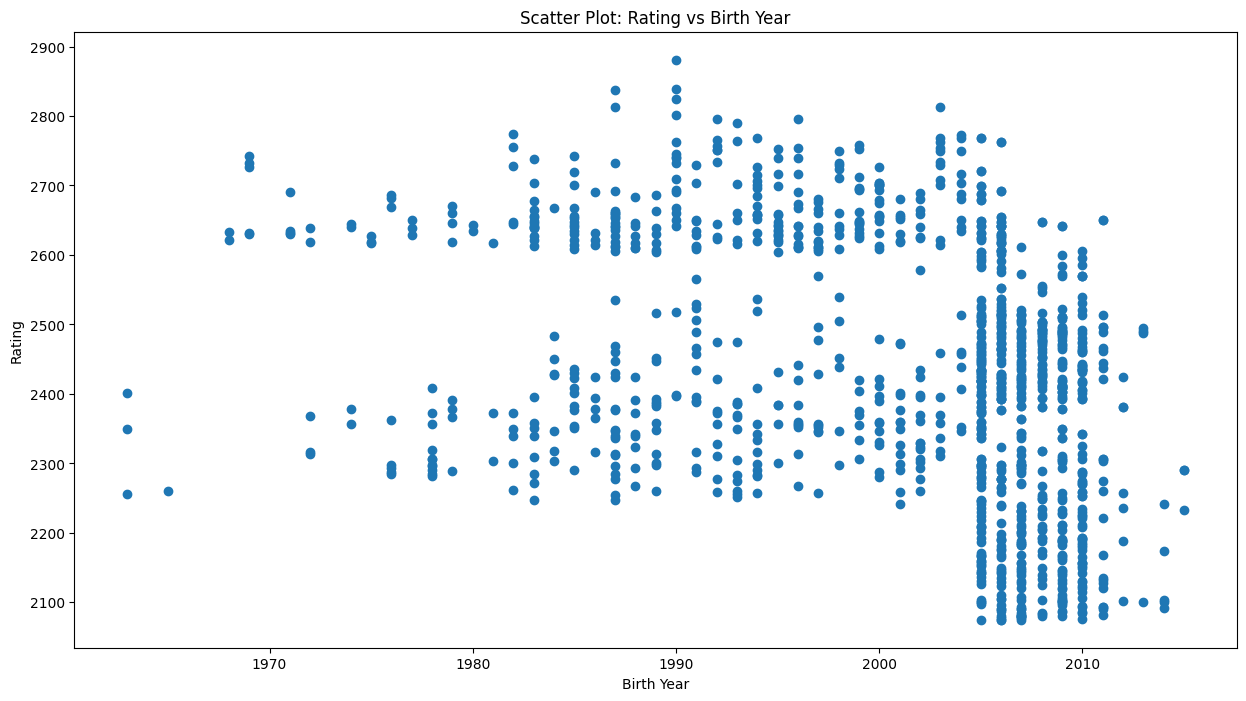

In [106]:
import matplotlib.pyplot as plt

# Rating vs Birth Year
plt.figure(figsize=(15,8))
plt.scatter(merged_df["Birth Year"], merged_df["Rating"])
plt.title("Scatter Plot: Rating vs Birth Year")
plt.xlabel("Birth Year")
plt.ylabel("Rating")
plt.show()


##**5.2 Histograms & Density Plots**

**Description:** This part shows distribution, frequency, shape, and possible outliers of numerical variables.

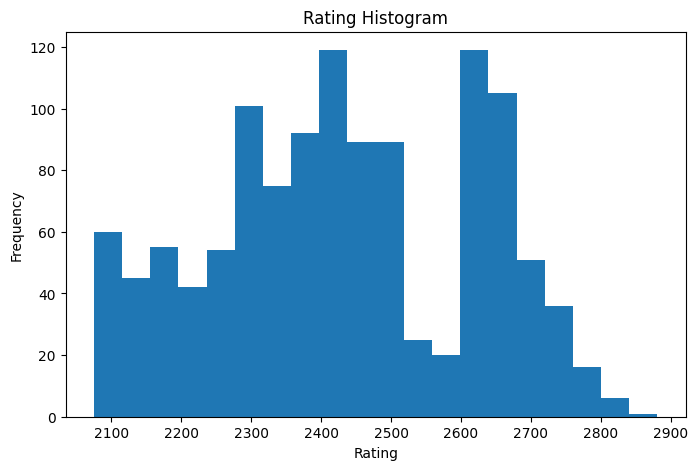

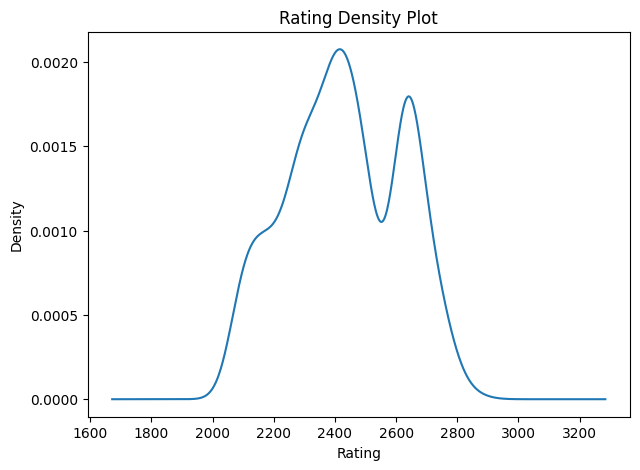

In [79]:
# Histogram
plt.figure(figsize=(8,5))
plt.hist(merged_df["Rating"], bins=20)
plt.title("Rating Histogram")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Density plot (KDE)
plt.figure(figsize=(7,5))
merged_df["Rating"].plot(kind="kde")
plt.title("Rating Density Plot")
plt.xlabel("Rating")
plt.show()

##**5.3 Heat Maps**

**Description:** This partvisualizes correlation values using color.
Quickly reveals strong/weak relationships.

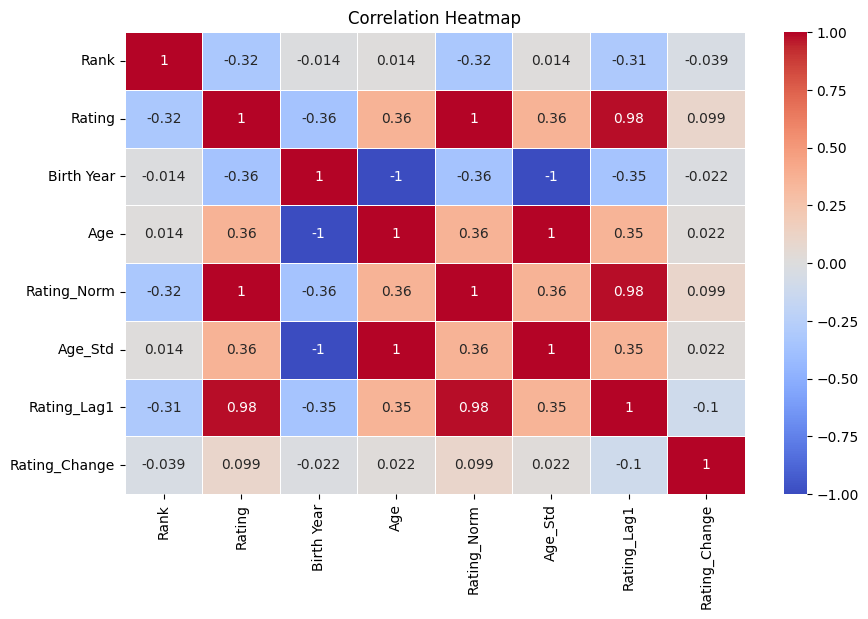

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = merged_df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


##**5.4 Bar Plots**

**Description:** This part visualizes counts of categorical variables.
Good for Category, Country, Format, etc.

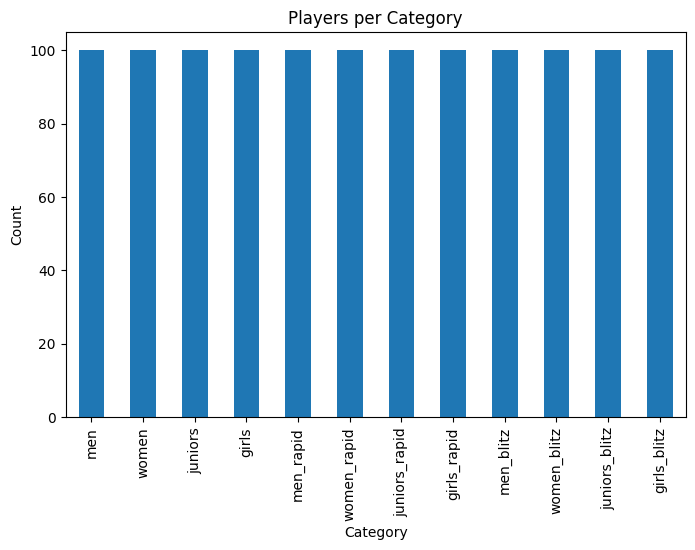

In [81]:
# Count of players per category (men, women, juniors, girls)
plt.figure(figsize=(8,5))
merged_df["Category"].value_counts().plot(kind="bar")
plt.title("Players per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


##**5.5 Time-Series Plots**

**Description:**
Here this part shows, how ratings change with birth year (not perfect time-series, but valid).

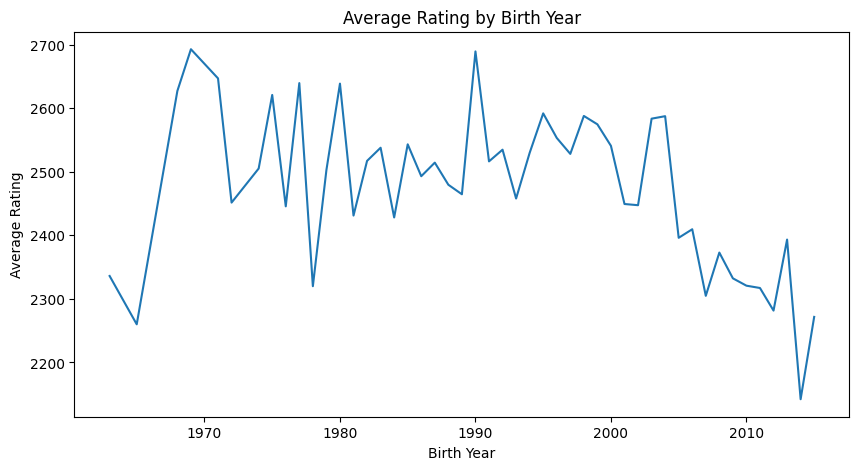

In [82]:
# Rating trend by Birth Year (approx time-series)
plt.figure(figsize=(10,5))
merged_df.groupby("Birth Year")["Rating"].mean().plot()
plt.title("Average Rating by Birth Year")
plt.xlabel("Birth Year")
plt.ylabel("Average Rating")
plt.show()


##**5.6 Box Plots**

**Description:** This part visualizes distribution + outliers.
Useful for comparing categories.

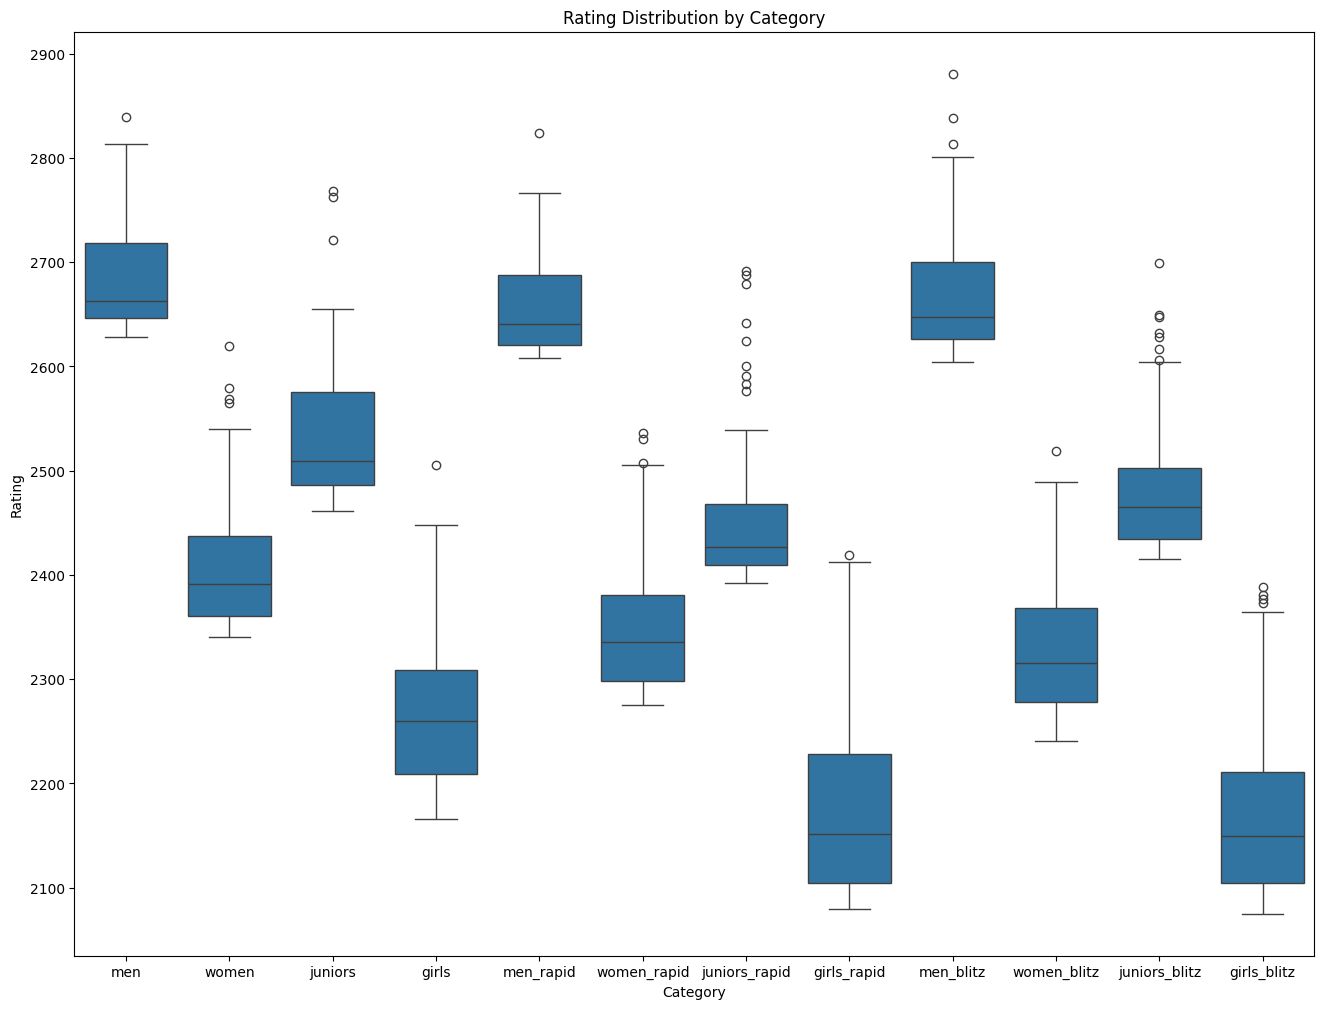

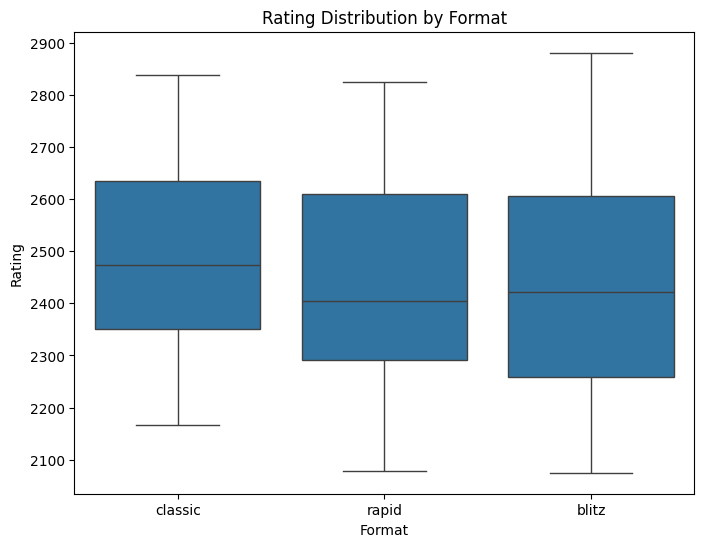

In [84]:
# Rating distribution by Category
plt.figure(figsize=(16,12))
sns.boxplot(data=merged_df, x="Category", y="Rating")
plt.title("Rating Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.show()

# Rating distribution by Format (classic / rapid / blitz)
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x="Format", y="Rating")
plt.title("Rating Distribution by Format")
plt.xlabel("Format")
plt.ylabel("Rating")
plt.show()


# **Task 6: Results Explanation**

**Summary of Descriptive Statistics**

In [85]:
# Compute basic stats
summary_stats = merged_df.describe()
print("Summary Statistics:")
print(summary_stats)

# Example interpretation (can be printed as well)
print("\nInterpretation:")
print("- The average rating is", round(summary_stats.loc["mean","Rating"],2))
print("- The median rating is", round(summary_stats.loc["50%","Rating"],2))
print("- Ratings vary with a standard deviation of", round(summary_stats.loc["std","Rating"],2))

# Explanation:
# Central tendency (mean, median) shows typical player strength.
# Std indicates variation—large std → wide spread in ratings.


Summary Statistics:
              Rank       Rating   Birth Year          Age  Rating_Norm  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean     50.500000  2431.271667  2000.359167    24.640833     0.442024   
std      28.878105   185.771204    10.022668    10.022668     0.230485   
min       1.000000  2075.000000  1963.000000    10.000000     0.000000   
25%      25.750000  2294.000000  1994.000000    17.000000     0.271712   
50%      50.500000  2424.000000  2005.000000    20.000000     0.433002   
75%      75.250000  2614.000000  2008.000000    31.000000     0.668734   
max     100.000000  2881.000000  2015.000000    62.000000     1.000000   

            Age_Std  Rating_Lag1  Rating_Change  
count  1.200000e+03  1199.000000    1199.000000  
mean   2.368476e-17  2431.568807      -0.637198  
std    1.000417e+00   185.563218      37.745426  
min   -1.461381e+00  2075.000000     -85.000000  
25%   -7.626731e-01  2294.500000      -3.000000  
50%   -4.6322

**Hypothesis Testing Interpretation**

In [90]:
from scipy.stats import ttest_ind, f_oneway

men = merged_df[merged_df["Category"]=="men"]["Rating"]
women = merged_df[merged_df["Category"]=="women"]["Rating"]
t_stat, p_val = ttest_ind(men, women, equal_var=False)

print("\nT-test: Men vs Women Ratings")
print("p-value:", p_val)
if p_val < 0.05:
    print("Interpretation: Significant difference in ratings between men and women.")
else:
    print("Interpretation: No significant difference in ratings between men and women.")

# If p < 0.05 → reject null hypothesis → difference exists.
# ANOVA can show differences across formats (classic/rapid/blitz).



T-test: Men vs Women Ratings
p-value: 3.9406489278126054e-84
Interpretation: Significant difference in ratings between men and women.
